<a href="https://colab.research.google.com/github/Hajira-max/Codsoft-/blob/main/Untitled24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Using device: cpu


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]


Upload an image (or cancel to stop)...


Saving cat-dog-s-head-ai-generated-image-sitting-top-smiling-against-green-background-382773936.jpg to cat-dog-s-head-ai-generated-image-sitting-top-smiling-against-green-background-382773936.jpg


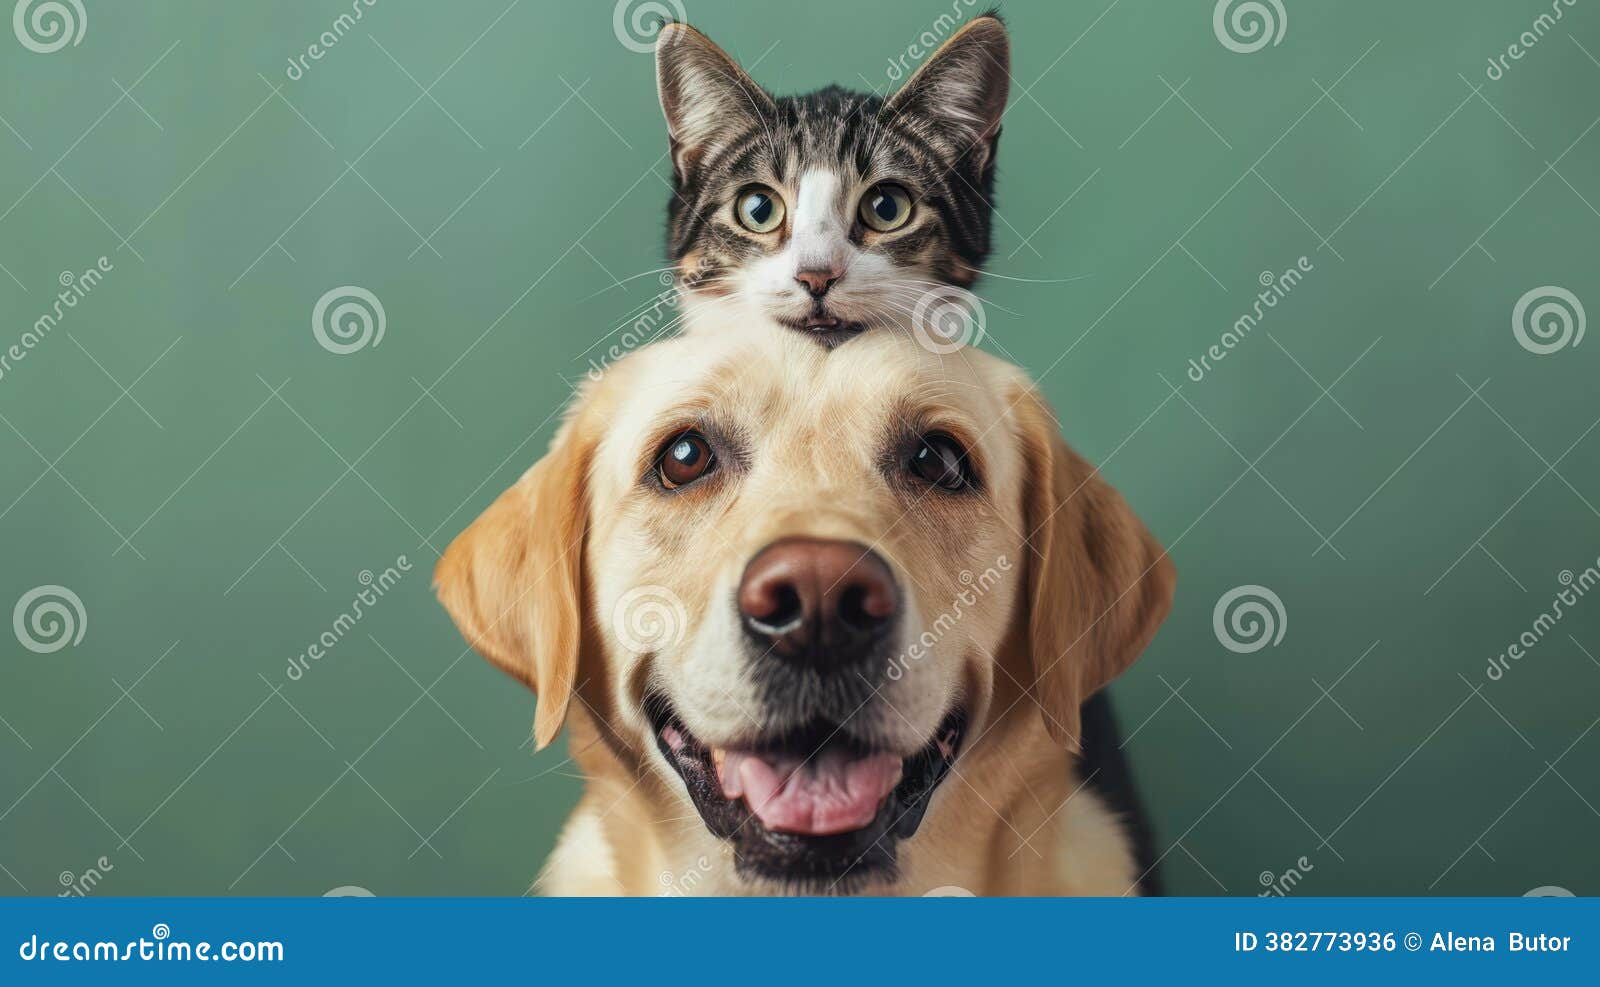

Caption: a cat is sitting on the head of a dog

Do you want to upload another image? (y/n): y

Upload an image (or cancel to stop)...


Saving outlooktraveller_2023-08_156f2273-1d67-40fa-9565-8ad62d5c56f7_experience_nature_2nd_option.avif to outlooktraveller_2023-08_156f2273-1d67-40fa-9565-8ad62d5c56f7_experience_nature_2nd_option.avif


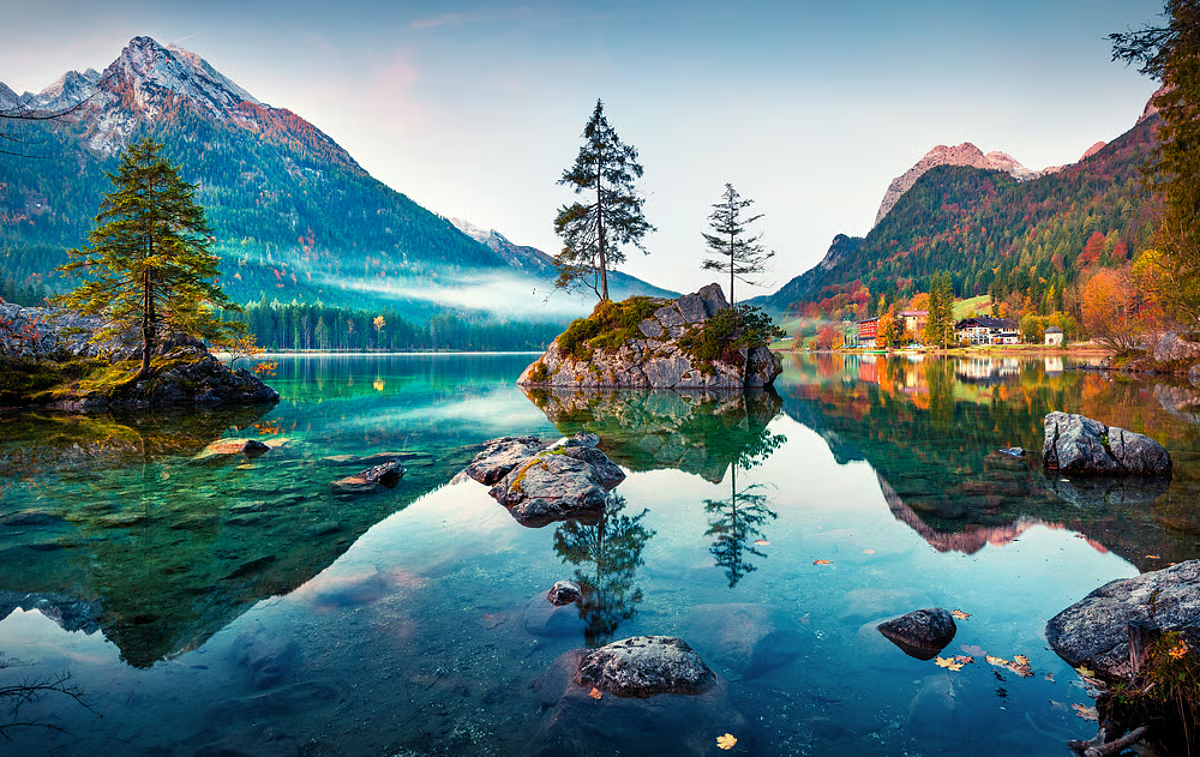

Caption: a lake with mountains in the background

Do you want to upload another image? (y/n): n

All generated captions:
cat-dog-s-head-ai-generated-image-sitting-top-smiling-against-green-background-382773936.jpg -> a cat is sitting on the head of a dog
outlooktraveller_2023-08_156f2273-1d67-40fa-9565-8ad62d5c56f7_experience_nature_2nd_option.avif -> a lake with mountains in the background


In [1]:
# CONTINUOUS IMAGE UPLOAD & CAPTIONING

from google.colab import files
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load BLIP model (keep in memory for multiple images)
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.to(device)
model.eval()

def caption_image(image_path):
    """Generate caption for a single image"""
    image = Image.open(image_path).convert("RGB")
    display(image)  # Show the image in notebook

    inputs = processor(images=image, return_tensors="pt")
    inputs = {k: v.to(device) for k, v in inputs.items()}

    output_ids = model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)
    caption = processor.decode(output_ids[0], skip_special_tokens=True)
    return caption

# Dictionary to store all captions
all_captions = {}

# Continuous upload loop

while True:
    print("\nUpload an image (or cancel to stop)...")
    try:
        uploaded = files.upload()
    except Exception as e:
        print("Upload canceled or error:", e)
        break

    if not uploaded:
        print("No file uploaded. Exiting loop.")
        break

    for image_path in uploaded.keys():
        try:
            cap = caption_image(image_path)
            all_captions[image_path] = cap
            print("Caption:", cap)
        except Exception as e:
            print("Error processing", image_path, ":", e)

    # Ask user if they want to continue
    cont = input("\nDo you want to upload another image? (y/n): ").strip().lower()
    if cont != 'y':
        break

# Optional: show all captions summary
print("\nAll generated captions:")
for img, caption in all_captions.items():
    print(f"{img} -> {caption}")